***Assignment 3***


---


***Hamdan Abdollah - 2021186***

In [ ]:
import pandas as pd

DATASET LOADING AND MERGING

In [ ]:
import pandas as pd

# Load users.dat
users = pd.read_csv('users.dat', sep='::', engine='python',
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

# Load movies.dat with encoding='latin-1'
movies = pd.read_csv('movies.dat', sep='::', engine='python',
                     names=['MovieID', 'Title', 'Genres'], encoding='latin-1')

# Load ratings.dat
ratings = pd.read_csv('ratings.dat', sep='::', engine='python',
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Merge ratings and users
ratings_users = pd.merge(ratings, users, on='UserID')

# Merge with movies
df = pd.merge(ratings_users, movies, on='MovieID')

print(df.head())



   UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       1      661       3  978302109      F    1          10    48067   
2       1      914       3  978301968      F    1          10    48067   
3       1     3408       4  978300275      F    1          10    48067   
4       1     2355       5  978824291      F    1          10    48067   

                                    Title                        Genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  


In [ ]:
df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


DATA EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [ ]:
df.describe()

,UserID,MovieID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


FURTHER DATA EXPLORATION AND CLEANING

In [ ]:
# Number of unique users
num_users = df['UserID'].nunique()
print(f'Number of unique users: {num_users}')

Number of unique users: 6040


In [ ]:
# Number of unique movies
num_movies = df['MovieID'].nunique()
print(f'Number of unique movies: {num_movies}')

Number of unique movies: 3706


In [ ]:

# Number of ratings
num_ratings = df.shape[0]
print(f'Number of total ratings: {num_ratings}')

Number of total ratings: 1000209


In [ ]:
# Rating distribution
print('\nRating value counts:')
print(df['Rating'].value_counts().sort_index())


Rating value counts:
Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: count, dtype: int64


In [ ]:
# Average rating per user
avg_rating_per_user = df.groupby('UserID')['Rating'].mean().describe()
print('\nAverage rating per user (summary):')
print(avg_rating_per_user)


Average rating per user (summary):
count    6040.000000
mean        3.702705
std         0.429622
min         1.015385
25%         3.444444
50%         3.735294
75%         4.000000
max         4.962963
Name: Rating, dtype: float64


In [ ]:
# Average rating per movie
avg_rating_per_movie = df.groupby('MovieID')['Rating'].mean().describe()
print('\nAverage rating per movie (summary):')
print(avg_rating_per_movie)


Average rating per movie (summary):
count    3706.000000
mean        3.238892
std         0.672925
min         1.000000
25%         2.822705
50%         3.331546
75%         3.740741
max         5.000000
Name: Rating, dtype: float64


In [ ]:

# Gender distribution of users
print('\nGender distribution:')
print(df['Gender'].value_counts())


Gender distribution:
Gender
M    753769
F    246440
Name: count, dtype: int64


In [ ]:
# Age distribution of users (show bins)
print('\nAge distribution:')
print(df['Age'].value_counts().sort_index())


Age distribution:
Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: count, dtype: int64


In [ ]:
# Top 10 most rated movies
top_movies = df.groupby('Title').size().sort_values(ascending=False).head(10)
print('\nTop 10 most rated movies:')
print(top_movies)


Top 10 most rated movies:
Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64


**ONE HOT ENCODING**

> for df_model preparation


In [ ]:
# Sample genres distribution
genres_series = df['Genres'].str.split('|').explode()
print('\nGenre distribution (counts):')
print(genres_series.value_counts())


Genre distribution (counts):
Genres
Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
Name: count, dtype: int64


In [ ]:
df_model = df.drop(columns=['Zip-code', 'Title', 'Timestamp'])


In [ ]:
df_model

,UserID,MovieID,Rating,Age,Occupation,Genres,Gender_F,Gender_M
0,1,1193,5,1,10,Drama,True,False
1,1,661,3,1,10,Animation|Children's|Musical,True,False
2,1,914,3,1,10,Musical|Romance,True,False
3,1,3408,4,1,10,Drama,True,False
4,1,2355,5,1,10,Animation|Children's|Comedy,True,False
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,25,6,Comedy,False,True
1000205,6040,1094,5,25,6,Drama|Romance|War,False,True
1000206,6040,562,5,25,6,Comedy|Drama,False,True
1000207,6040,1096,4,25,6,Drama,False,True


In [ ]:
df_model['Gender_F'] = df_model['Gender_F'].astype(int)
df_model['Gender_M'] = df_model['Gender_M'].astype(int)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split genres strings into lists
df_model['Genres'] = df_model['Genres'].str.split('|')

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform genres into one-hot encoded DataFrame
genres_encoded = pd.DataFrame(mlb.fit_transform(df_model['Genres']),
                              columns=mlb.classes_,
                              index=df_model.index)

# Drop the original Genres column
df_model = df_model.drop(columns=['Genres'])

# Concatenate the one-hot encoded genre columns
df_model = pd.concat([df_model, genres_encoded], axis=1)

# Check the result
print(df_model.head())


   UserID  MovieID  Rating  Age  Occupation  Gender_F  Gender_M  Action  \
0       1     1193       5    1          10         1         0       0   
1       1      661       3    1          10         1         0       0   
2       1      914       3    1          10         1         0       0   
3       1     3408       4    1          10         1         0       0   
4       1     2355       5    1          10         1         0       0   

   Adventure  Animation  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0          0          0  ...        0          0       0        0        0   
1          0          1  ...        0          0       0        1        0   
2          0          0  ...        0          0       0        1        0   
3          0          0  ...        0          0       0        0        0   
4          0          1  ...        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0    0  

In [ ]:
df_model

,UserID,MovieID,Rating,Age,Occupation,Gender_F,Gender_M,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,1,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,1,10,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,1,10,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,1,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,1,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,25,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,5,25,6,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,5,25,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,4,25,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **MLP model for Rating Prediction**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Dataset for MLP
class MovieLensDataset(Dataset):
    def __init__(self, df, user_max, movie_max):
        self.user_ids = df['UserID'].values.astype(np.int64)
        self.movie_ids = df['MovieID'].values.astype(np.int64)
        self.features = df.drop(columns=['UserID', 'MovieID', 'Rating']).values.astype(np.float32)
        self.ratings = df['Rating'].values.astype(np.float32)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return (self.user_ids[idx], self.movie_ids[idx], self.features[idx]), self.ratings[idx]

# MLP with embeddings
class MLPWithEmbeddings(nn.Module):
    def __init__(self, num_users, num_movies, num_features, emb_size=32):
        super().__init__()
        self.user_emb = nn.Embedding(num_users+1, emb_size)
        self.movie_emb = nn.Embedding(num_movies+1, emb_size)
        self.fc1 = nn.Linear(emb_size*2 + num_features, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, user_id, movie_id, features):
        user_emb = self.user_emb(user_id)
        movie_emb = self.movie_emb(movie_id)
        x = torch.cat([user_emb, movie_emb, features], dim=1)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x.squeeze()

# Assuming df_model is loaded and preprocessed dataframe

# Parameters
num_users = df_model['UserID'].max()
num_movies = df_model['MovieID'].max()

# Train-test split
train_df, test_df = train_test_split(df_model, test_size=0.2, random_state=42)

train_dataset = MovieLensDataset(train_df, num_users, num_movies)
test_dataset = MovieLensDataset(test_df, num_users, num_movies)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MLPWithEmbeddings(num_users, num_movies, train_df.shape[1] - 3)  # -UserID, MovieID, Rating
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for (user_id, movie_id, features), ratings in train_loader:
        user_id, movie_id, features, ratings = user_id.to(device), movie_id.to(device), features.to(device), ratings.to(device)

        optimizer.zero_grad()
        outputs = model(user_id, movie_id, features)
        loss = criterion(outputs, ratings)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
preds, targets = [], []
with torch.no_grad():
    for (user_id, movie_id, features), ratings in test_loader:
        user_id, movie_id, features = user_id.to(device), movie_id.to(device), features.to(device)
        outputs = model(user_id, movie_id, features)
        preds.append(outputs.cpu().numpy())
        targets.append(ratings.numpy())

preds = np.concatenate(preds)
targets = np.concatenate(targets)

rmse = np.sqrt(mean_squared_error(targets, preds))
mae = mean_absolute_error(targets, preds)

print(f"MLP Test RMSE: {rmse:.4f}")
print(f"MLP Test MAE: {mae:.4f}")

# Save the model
torch.save(model.state_dict(), 'mlp_model.pth')


Epoch 1/20, Loss: 1.0589
Epoch 2/20, Loss: 0.8571
Epoch 3/20, Loss: 0.8277
Epoch 4/20, Loss: 0.8137
Epoch 5/20, Loss: 0.8018
Epoch 6/20, Loss: 0.7923
Epoch 7/20, Loss: 0.7824
Epoch 8/20, Loss: 0.7728
Epoch 9/20, Loss: 0.7638
Epoch 10/20, Loss: 0.7552
Epoch 11/20, Loss: 0.7463
Epoch 12/20, Loss: 0.7379
Epoch 13/20, Loss: 0.7298
Epoch 14/20, Loss: 0.7214
Epoch 15/20, Loss: 0.7128
Epoch 16/20, Loss: 0.7050
Epoch 17/20, Loss: 0.6966
Epoch 18/20, Loss: 0.6883
Epoch 19/20, Loss: 0.6804
Epoch 20/20, Loss: 0.6726
MLP Test RMSE: 0.9151
MLP Test MAE: 0.7239


# TRAINING LOSS CURVES

In [ ]:
batch = next(iter(test_loader))
print(type(batch))
print(len(batch))
print(batch)


<class 'list'>
1
[tensor([[25., 12.,  0.,  ...,  0.,  0.,  0.],
        [45.,  2.,  1.,  ...,  1.,  0.,  0.],
        [25.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [50.,  6.,  1.,  ...,  0.,  0.,  0.],
        [18.,  4.,  0.,  ...,  0.,  0.,  0.],
        [35., 17.,  0.,  ...,  0.,  0.,  0.]])]


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define custom Dataset if you haven't yet
class MovieLensDataset(Dataset):
    def __init__(self, df, num_users, num_movies):
        self.user_ids = df['UserID'].values.astype(np.int64)
        self.movie_ids = df['MovieID'].values.astype(np.int64)
        self.features = df.drop(columns=['UserID', 'MovieID', 'Rating']).values.astype(np.float32)
        self.ratings = df['Rating'].values.astype(np.float32)
        self.num_users = num_users
        self.num_movies = num_movies

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return (self.user_ids[idx], self.movie_ids[idx], self.features[idx]), self.ratings[idx]

# Then recreate test dataset and dataloader correctly
num_users = df_model['UserID'].max()
num_movies = df_model['MovieID'].max()

# Assuming you have test_df (from train_test_split)
test_dataset = MovieLensDataset(test_df, num_users, num_movies)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# Now this test_loader will yield ( (user_id, movie_id, features), ratings ) pairs.


In [ ]:
model.eval()
preds = []
targets = []
with torch.no_grad():
    for (user_id, movie_id, features), ratings in test_loader:
        user_id = user_id.to(device)
        movie_id = movie_id.to(device)
        features = features.to(device)
        outputs = model(user_id, movie_id, features)
        preds.append(outputs.cpu().numpy())
        targets.append(ratings.numpy())

preds = np.concatenate(preds)
targets = np.concatenate(targets)

rmse = np.sqrt(mean_squared_error(targets, preds))
mae = mean_absolute_error(targets, preds)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")


Test RMSE: 0.9151
Test MAE: 0.7239


# MODEL TRAIN/TEST WITH VISUALIZATIONS

Test RMSE: 0.9151
Test MAE: 0.7239


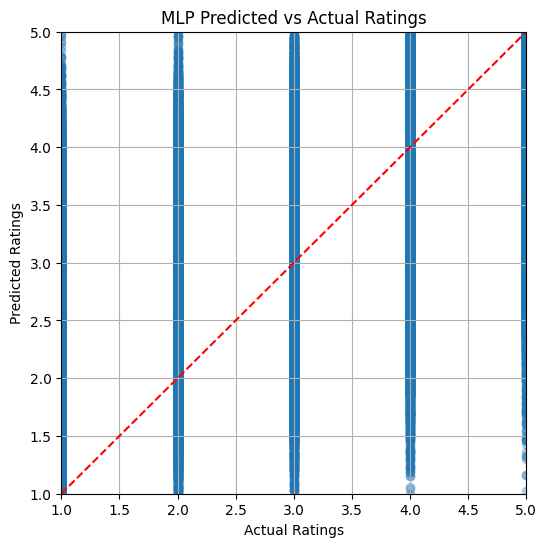

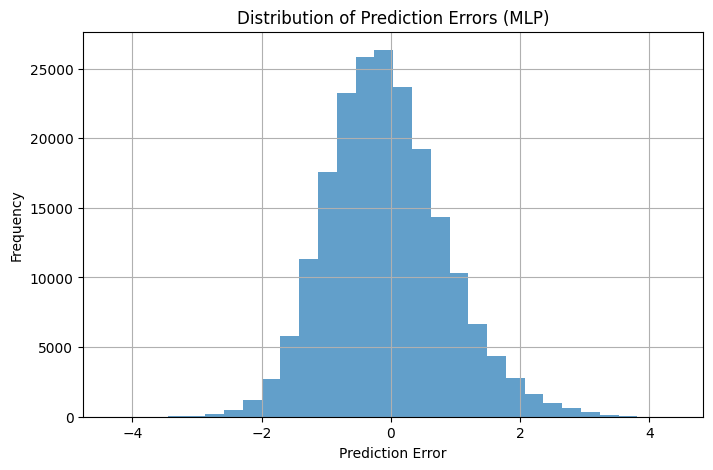

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Define your model class exactly as before ---

class MLPWithEmbeddings(torch.nn.Module):
    def __init__(self, num_users, num_movies, num_features, emb_size=32):
        super().__init__()
        self.user_emb = torch.nn.Embedding(num_users + 1, emb_size)
        self.movie_emb = torch.nn.Embedding(num_movies + 1, emb_size)
        self.fc1 = torch.nn.Linear(emb_size*2 + num_features, 128)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(128, 64)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(64, 1)

    def forward(self, user_id, movie_id, features):
        user_emb = self.user_emb(user_id)
        movie_emb = self.movie_emb(movie_id)
        x = torch.cat([user_emb, movie_emb, features], dim=1)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x.squeeze()

# --- Parameters (fill in exact numbers used for training) ---
num_users = df_model['UserID'].max()
num_movies = df_model['MovieID'].max()
num_features = df_model.shape[1] - 3  # minus UserID, MovieID, Rating

# --- Initialize and load model ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLPWithEmbeddings(num_users, num_movies, num_features)
model.load_state_dict(torch.load('mlp_model.pth', map_location=device))
model.to(device)
model.eval()

# --- Evaluate on test set ---
preds = []
targets = []

with torch.no_grad():
    for (user_id, movie_id, features), ratings in test_loader:
        user_id = user_id.to(device)
        movie_id = movie_id.to(device)
        features = features.to(device)
        outputs = model(user_id, movie_id, features)
        preds.append(outputs.cpu().numpy())
        targets.append(ratings.numpy())

preds = np.concatenate(preds)
targets = np.concatenate(targets)

rmse = np.sqrt(mean_squared_error(targets, preds))
mae = mean_absolute_error(targets, preds)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")

# --- Visualizations ---

# 1. Predicted vs Actual Ratings scatter plot
plt.figure(figsize=(6,6))
plt.scatter(targets, preds, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('MLP Predicted vs Actual Ratings')
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.grid(True)
plt.show()

# 2. Error Distribution Histogram
errors = preds - targets
plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('PREDICTION ERROR(MLP) DISTRIBUTION')
plt.grid(True)
plt.show()


# AUTO ENCODING

Epoch 1/20, Loss: 0.0172
Epoch 2/20, Loss: 0.0076
Epoch 3/20, Loss: 0.0063
Epoch 4/20, Loss: 0.0063
Epoch 5/20, Loss: 0.0059
Epoch 6/20, Loss: 0.0054
Epoch 7/20, Loss: 0.0051
Epoch 8/20, Loss: 0.0051
Epoch 9/20, Loss: 0.0051
Epoch 10/20, Loss: 0.0051
Epoch 11/20, Loss: 0.0050
Epoch 12/20, Loss: 0.0046
Epoch 13/20, Loss: 0.0045
Epoch 14/20, Loss: 0.0042
Epoch 15/20, Loss: 0.0043
Epoch 16/20, Loss: 0.0042
Epoch 17/20, Loss: 0.0042
Epoch 18/20, Loss: 0.0042
Epoch 19/20, Loss: 0.0042
Epoch 20/20, Loss: 0.0037
Autoencoder Test Reconstruction RMSE: 0.0599


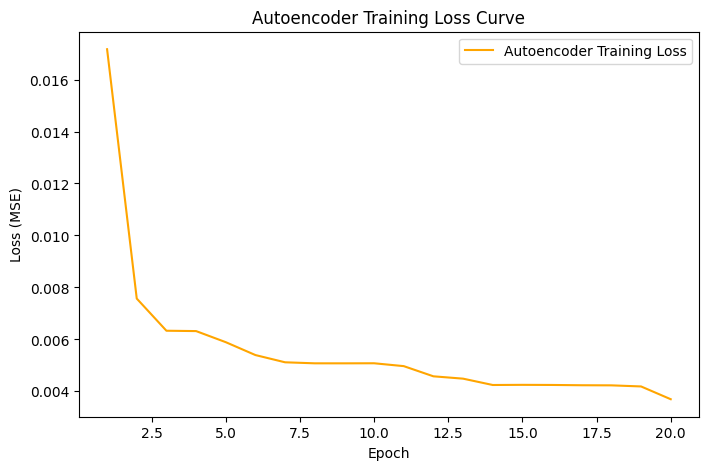

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Autoencoder architecture (same as before)
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # Sigmoid expects input in range [0,1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Prepare features dataset (exclude UserID, MovieID, Rating)
feature_cols = df_model.drop(columns=['UserID', 'MovieID', 'Rating']).columns
features = df_model[feature_cols].values.astype(np.float32)

# Normalize features using MinMaxScaler (0 to 1)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split on scaled features
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(torch.tensor(X_train))
test_dataset = TensorDataset(torch.tensor(X_test))

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Autoencoder(X_train.shape[1])
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 20
train_losses = []

# Training loop with loss tracking
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for (features_batch,) in train_loader:
        features_batch = features_batch.to(device)
        optimizer.zero_grad()
        outputs = model(features_batch)
        loss = criterion(outputs, features_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# Evaluation on test set (Reconstruction RMSE)
model.eval()
losses = []
with torch.no_grad():
    for (features_batch,) in test_loader:
        features_batch = features_batch.to(device)
        outputs = model(features_batch)
        loss = nn.functional.mse_loss(outputs, features_batch, reduction='mean').item()
        losses.append(loss)

avg_loss = np.mean(losses)
rmse = np.sqrt(avg_loss)

print(f"Autoencoder Test Reconstruction RMSE: {rmse:.4f}")

# (Optional) Plot training loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Autoencoder Training Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Autoencoder Training Loss Curve')
plt.legend()
plt.show()

# Save the model
torch.save(model.state_dict(), 'autoencoder_model.pth')


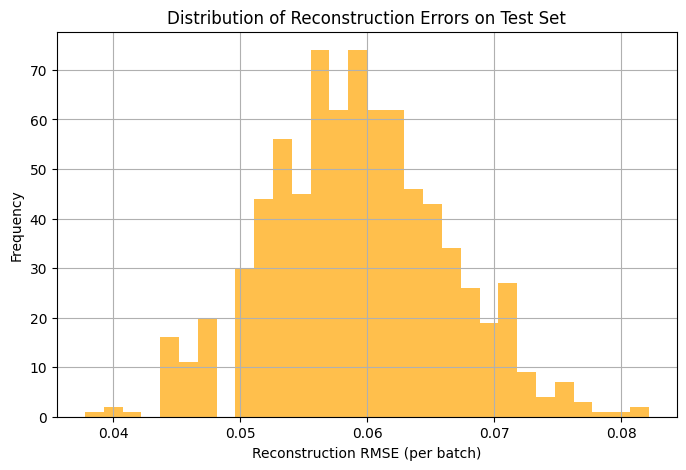

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert batch MSE losses to RMSE
reconstruction_rmse = np.sqrt(losses)

plt.figure(figsize=(8,5))
plt.hist(reconstruction_rmse, bins=30, alpha=0.7, color='orange')
plt.xlabel('Reconstruction RMSE (per batch)')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors on Test Set')
plt.grid(True)
plt.show()


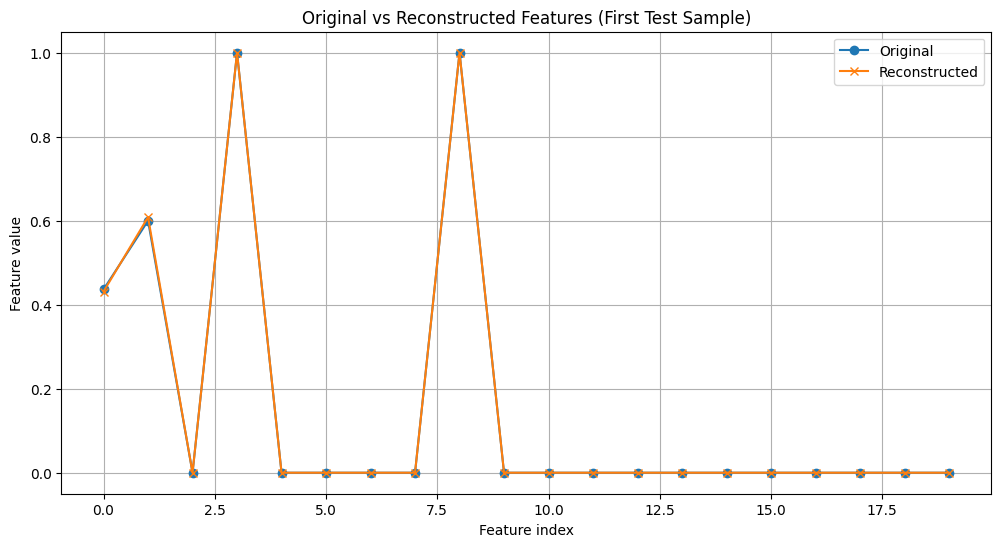

In [ ]:
import torch

model.eval()

# Get a batch of test data
features_batch, = next(iter(test_loader))
features_batch = features_batch.to(device)

with torch.no_grad():
    reconstructed = model(features_batch)

features_batch = features_batch.cpu().numpy()
reconstructed = reconstructed.cpu().numpy()

# Plot original vs reconstructed for first sample (only a subset of features for clarity)
num_features_to_plot = 20
plt.figure(figsize=(12,6))
plt.plot(features_batch[0, :num_features_to_plot], label='Original', marker='o')
plt.plot(reconstructed[0, :num_features_to_plot], label='Reconstructed', marker='x')
plt.xlabel('Feature index')
plt.ylabel('Feature value')
plt.title('Original vs Reconstructed Features (First Test Sample)')
plt.legend()
plt.grid(True)
plt.show()
